## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [10]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 
redice_lr_patient = [5,10]
reduce_lr_factor = [0.05, 0.03, 0.01]

In [16]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""         

'Code Here\n建立實驗的比較組合\n'

In [17]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.05, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_38 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 14s 276us/step - loss: 1.8355 - acc: 0.3631 - val_loss: 1.8685 - val_acc: 0.3512
Epoch 13/25
50000/50000 [==============================] - 14s 273us/step - loss: 1.8183 - acc: 0.3685 - val_loss: 1.8532 - val_acc: 0.3574
Epoch 14/25
50000/50000 [==============================] - 14s 270us/step - loss: 1.8011 - acc: 0.3736 - val_loss: 1.8405 - val_acc: 0.3610
Epoch 15/25
50000/50000 [==============================] - 14s 271us/step - loss: 1.7862 - acc: 0.3773 - val_loss: 1.8285 - val_acc: 0.3647
Epoch 16/25
50000/50000 [==============================] - 14s 271us/step - loss: 1.7725 - acc: 0.3844 - val_loss: 1.8168 - val_acc: 0.3669
Epoch 17/25
50000/50000 [==============================] - 13s 266us/step - loss: 1.7596 - acc: 0.3871 - val_loss: 1.8053 - val_acc: 0.3709
Epoch 18/25
50000/50000 [==============================] - 13s 269us/step - loss: 1.7473 - acc: 0.3912 - val_loss: 1.7959 - val_acc: 0.3733
Epoch 19/25
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 16s 322us/step - loss: 2.7842 - acc: 0.1354 - val_loss: 2.6469 - val_acc: 0.2039
Epoch 2/25
50000/50000 [==============================] - 14s 271us/step - loss: 2.4067 - acc: 0.2149 - val_loss: 2.4270 - val_acc: 0.2423
Epoch 3/25
50000/50000 [==============================] - 14s 271us/step - loss: 2.2484 - acc: 0.2505 - val_loss: 2.2657 - val_acc: 0.2624
Epoch 4/25
50000/50000 [==============================] - 14s 273us/step - loss: 2.1535 - acc: 0.2730 - val_loss: 2.1740 - val_acc: 0.2797
Epoch 5/25
50000/50000 [==============================] - 14s 280us/step - loss: 2.0836 - acc: 0.2921 - val_loss: 2.1060 - val_acc: 0.2926
Epoch 6/25
50000/50000 [==============================] - 14s 281us/step - loss: 2.0313 - acc: 0.3047 - val_loss: 2.0534 - val_acc: 0.3070
Epoch 7/25
50000/50000 [==============================] - 13s 263us/step - loss: 1.9889 - acc: 0.3160 - val_loss: 2.

50000/50000 [==============================] - 14s 275us/step - loss: 1.6893 - acc: 0.4119 - val_loss: 1.7626 - val_acc: 0.3856
Epoch 24/25
50000/50000 [==============================] - 14s 271us/step - loss: 1.6809 - acc: 0.4152 - val_loss: 1.7551 - val_acc: 0.3885
Epoch 25/25
50000/50000 [==============================] - 13s 269us/step - loss: 1.6715 - acc: 0.4184 - val_loss: 1.7493 - val_acc: 0.3897
Numbers of exp: 5, reduce_factor: 0.01, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_52 (Batc (None, 512)               2048      
_________________________________________________________________
hidde

50000/50000 [==============================] - 14s 289us/step - loss: 0.9924 - acc: 0.6600 - val_loss: 1.4703 - val_acc: 0.4803
Epoch 10/25
50000/50000 [==============================] - 14s 285us/step - loss: 0.9736 - acc: 0.6667 - val_loss: 1.4089 - val_acc: 0.5017
Epoch 11/25
50000/50000 [==============================] - 14s 288us/step - loss: 0.9593 - acc: 0.6721 - val_loss: 1.3583 - val_acc: 0.5162
Epoch 12/25
50000/50000 [==============================] - 14s 286us/step - loss: 0.9479 - acc: 0.6753 - val_loss: 1.3397 - val_acc: 0.5286
Epoch 13/25
50000/50000 [==============================] - 14s 289us/step - loss: 0.9372 - acc: 0.6798 - val_loss: 1.3209 - val_acc: 0.5320
Epoch 14/25
50000/50000 [==============================] - 14s 284us/step - loss: 0.9276 - acc: 0.6835 - val_loss: 1.3409 - val_acc: 0.5269
Epoch 15/25
50000/50000 [==============================] - 14s 281us/step - loss: 0.9192 - acc: 0.6879 - val_loss: 1.3207 - val_acc: 0.5333
Epoch 16/25
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 16s 316us/step - loss: 2.5030 - acc: 0.1998 - val_loss: 2.4662 - val_acc: 0.2372
Epoch 2/25
50000/50000 [==============================] - 13s 262us/step - loss: 2.1363 - acc: 0.2832 - val_loss: 2.1697 - val_acc: 0.2869
Epoch 3/25
50000/50000 [==============================] - 13s 262us/step - loss: 2.0253 - acc: 0.3108 - val_loss: 2.0675 - val_acc: 0.3063
Epoch 4/25
50000/50000 [==============================] - 13s 262us/step - loss: 1.9601 - acc: 0.3305 - val_loss: 2.0056 - val_acc: 0.3232
Epoch 5/25
50000/50000 [==============================] - 13s 265us/step - loss: 1.9118 - acc: 0.3441 - val_loss: 1.9619 - val_acc: 0.3320
Epoch 6/25
50000/50000 [==============================] - 13s 262us/step - loss: 1.8756 - acc: 0.3555 - val_loss: 1.9283 - val_acc: 0.3432
Epoch 7/25
50000/50000 [==============================] - 13s 264us/step - loss: 1.8455 - acc: 0.3629 - val_loss: 1.

50000/50000 [==============================] - 13s 263us/step - loss: 1.6256 - acc: 0.4295 - val_loss: 1.7294 - val_acc: 0.4042
Epoch 24/25
50000/50000 [==============================] - 13s 266us/step - loss: 1.6186 - acc: 0.4329 - val_loss: 1.7247 - val_acc: 0.4046
Epoch 25/25
50000/50000 [==============================] - 13s 267us/step - loss: 1.6115 - acc: 0.4339 - val_loss: 1.7189 - val_acc: 0.4071
Numbers of exp: 10, reduce_factor: 0.01, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_67 (Batc (None, 512)               2048      
_________________________________________________________________
hidde

50000/50000 [==============================] - 14s 270us/step - loss: 1.7598 - acc: 0.3904 - val_loss: 1.8401 - val_acc: 0.3697
Epoch 11/25
50000/50000 [==============================] - 13s 265us/step - loss: 1.7430 - acc: 0.3965 - val_loss: 1.8255 - val_acc: 0.3742
Epoch 12/25
50000/50000 [==============================] - 13s 262us/step - loss: 1.7278 - acc: 0.4014 - val_loss: 1.8140 - val_acc: 0.3781
Epoch 13/25
50000/50000 [==============================] - 13s 263us/step - loss: 1.7141 - acc: 0.4056 - val_loss: 1.8034 - val_acc: 0.3832
Epoch 14/25
50000/50000 [==============================] - 13s 256us/step - loss: 1.7004 - acc: 0.4111 - val_loss: 1.7928 - val_acc: 0.3846
Epoch 15/25
50000/50000 [==============================] - 13s 256us/step - loss: 1.6881 - acc: 0.4139 - val_loss: 1.7858 - val_acc: 0.3873
Epoch 16/25
50000/50000 [==============================] - 13s 256us/step - loss: 1.6781 - acc: 0.4179 - val_loss: 1.7766 - val_acc: 0.3898
Epoch 17/25
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 17s 343us/step - loss: 2.7288 - acc: 0.1476 - val_loss: 2.6075 - val_acc: 0.1794
Epoch 2/25
50000/50000 [==============================] - 13s 266us/step - loss: 2.5302 - acc: 0.1877 - val_loss: 2.4704 - val_acc: 0.2189
Epoch 3/25
50000/50000 [==============================] - 13s 268us/step - loss: 2.3972 - acc: 0.2209 - val_loss: 2.3761 - val_acc: 0.2397
Epoch 4/25
50000/50000 [==============================] - 14s 272us/step - loss: 2.2979 - acc: 0.2439 - val_loss: 2.3013 - val_acc: 0.2582
Epoch 5/25
50000/50000 [==============================] - 13s 267us/step - loss: 2.2222 - acc: 0.2636 - val_loss: 2.2394 - val_acc: 0.2702
Epoch 6/25
50000/50000 [==============================] - 14s 273us/step - loss: 2.1620 - acc: 0.2781 - val_loss: 2.1890 - val_acc: 0.2784
Epoch 7/25
50000/50000 [==============================] - 14s 278us/step - loss: 2.1119 - acc: 0.2910 - val_loss: 2.

50000/50000 [==============================] - 13s 251us/step - loss: 1.7533 - acc: 0.3886 - val_loss: 1.8261 - val_acc: 0.3681
Epoch 24/25
50000/50000 [==============================] - 13s 250us/step - loss: 1.7433 - acc: 0.3935 - val_loss: 1.8171 - val_acc: 0.3710
Epoch 25/25
50000/50000 [==============================] - 13s 254us/step - loss: 1.7326 - acc: 0.3985 - val_loss: 1.8086 - val_acc: 0.3719
Numbers of exp: 15, reduce_factor: 0.03, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_82 (Batc (None, 512)               2048      
_________________________________________________________________
hidd

50000/50000 [==============================] - 13s 252us/step - loss: 2.0368 - acc: 0.3075 - val_loss: 2.0692 - val_acc: 0.3063
Epoch 11/25
50000/50000 [==============================] - 13s 250us/step - loss: 2.0042 - acc: 0.3162 - val_loss: 2.0407 - val_acc: 0.3149
Epoch 12/25
50000/50000 [==============================] - 13s 253us/step - loss: 1.9760 - acc: 0.3237 - val_loss: 2.0155 - val_acc: 0.3212
Epoch 13/25
50000/50000 [==============================] - 13s 252us/step - loss: 1.9512 - acc: 0.3312 - val_loss: 1.9933 - val_acc: 0.3283
Epoch 14/25
50000/50000 [==============================] - 13s 252us/step - loss: 1.9290 - acc: 0.3382 - val_loss: 1.9750 - val_acc: 0.3328
Epoch 15/25
50000/50000 [==============================] - 13s 253us/step - loss: 1.9082 - acc: 0.3454 - val_loss: 1.9562 - val_acc: 0.3385
Epoch 16/25
50000/50000 [==============================] - 13s 253us/step - loss: 1.8876 - acc: 0.3514 - val_loss: 1.9391 - val_acc: 0.3422
Epoch 17/25
50000/50000 [=======

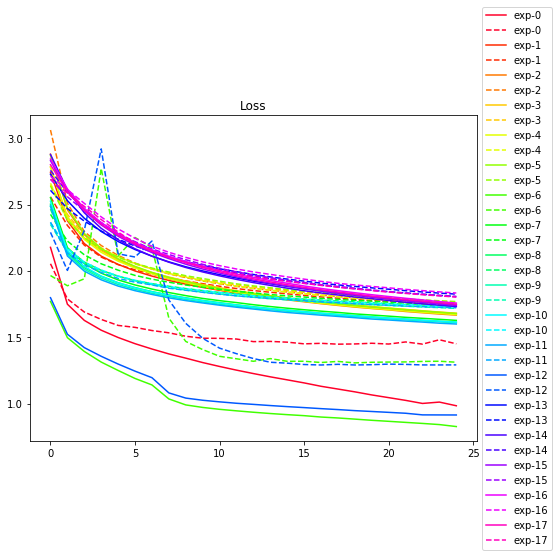

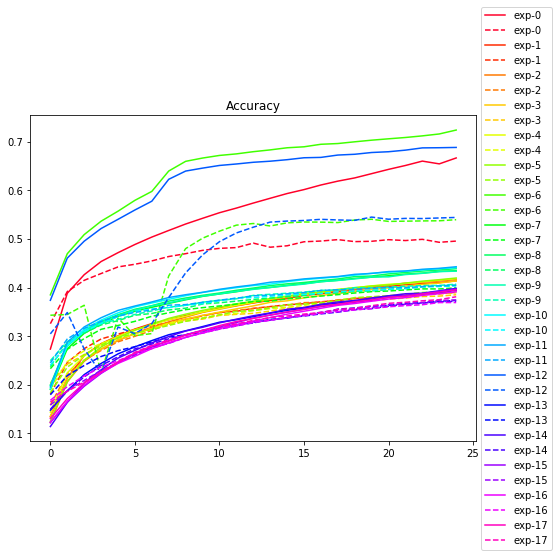

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()